# Real or Fake News Predictor using Naive Bayes

> <b> Purpose</b>: Develop a model to accurately predict Fake News from Real News text

> <b> Data</b>: Online news article data with title and article text as features, and a Fake | Real target label
https://assets.datacamp.com/production/repositories/932/datasets/cd04303b8b2904d1025809dfb29076de696a1ffc/News%20articles.zip

> <b> Naive Bayes</b>: This is an algorithm

## Imports and reading data

In [180]:
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize


import re,string,unicodedata
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('fake_or_real_news.csv')
print(df.head())

   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  


## Clean data

In [154]:
# Drop unnecessary column imported [common CSV bug]
df =df.drop(['Unnamed: 0'], axis=1)
print(df.head())

                                               title  \
0                       You Can Smell Hillary’s Fear   
1  Watch The Exact Moment Paul Ryan Committed Pol...   
2        Kerry to go to Paris in gesture of sympathy   
3  Bernie supporters on Twitter erupt in anger ag...   
4   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  


# EDA and Plots

In [179]:
# Check NULL values in data
df.isna().sum()

title    0
text     0
label    0
dtype: int64

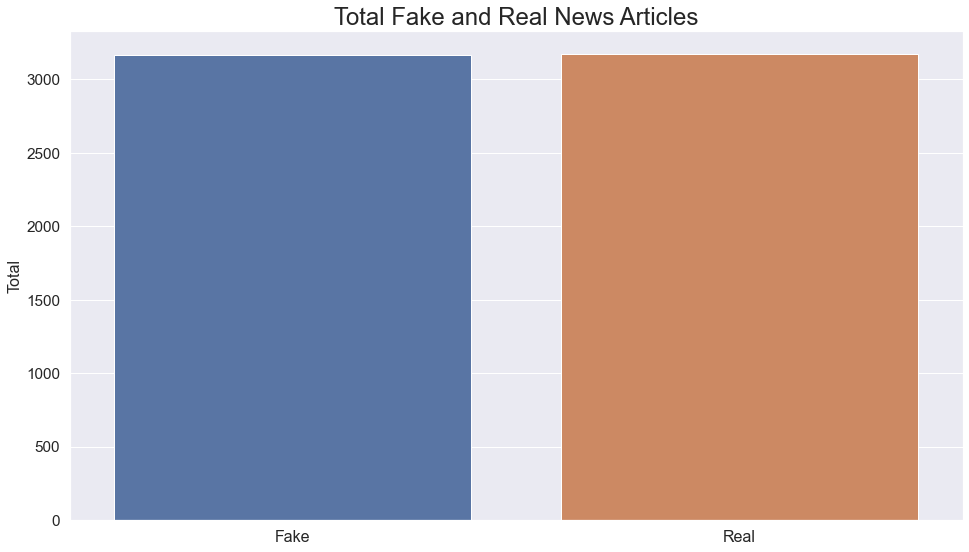

In [177]:
# Check proportion of fake : real news
plt.figure(figsize=(16,9))

sns.countplot(df.label)
plt.title('Total Fake and Real News Articles', fontsize=24)
plt.ylabel('Total', fontsize=16)
plt.xlabel('')
plt.xticks([0, 1], ['Fake', 'Real'], fontsize=16)

plt.show()

The data is not lopsided, real vs fake is split nearly 50/50. GREAT!

### Visuals

In [181]:
plt.figure(figsize = (20,20))
def clean(text: str) -> list:
    'A simple function to cleanup text data'
    
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    text = (text.encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split() # tokenization
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

corpus = clean(' '.join(df[df.label == 'Real'].text))

def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s)) 

corpus_str = listToString(corpus)

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# read the mask / color image taken from
coloring = np.array(Image.open(path.join(d, "real_news.jpg")))
stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", max_words = 2000 , width = 1600 , height = 800, mask=coloring,
               stopwords=stopwords, max_font_size=80, random_state=42)

# generate word cloud
wc.generate(corpus_str)

# create coloring from image
image_colors = ImageColorGenerator(coloring)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

# # This bit of code is used to create a high quality exported image
# fig1 = plt.gcf()
# plt.show()
# plt.draw()
# fig1.savefig("real_news_nlp_word_cloud.png", bbox_inches='tight', dpi=600)

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/Users/alimotlagh/nltk_data'
    - '/Users/alimotlagh/opt/anaconda3/nltk_data'
    - '/Users/alimotlagh/opt/anaconda3/share/nltk_data'
    - '/Users/alimotlagh/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


<Figure size 1440x1440 with 0 Axes>

### Split data in to training & testing sets

In [155]:
# Create a series to store the labels [FAKE or TRUE news]: y
y = df.label

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'],y,test_size =0.3, random_state =5)

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words='english')

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train.values)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test.values)

# Sample of words extracted from text data: 'feature names'
print('sample of words from our data:',count_vectorizer.get_feature_names()[:-1][52401:52411])

sample of words from our data: ['trues', 'truest', 'truism', 'trukachev', 'trukhacheva', 'truly', 'truman', 'trumka', 'trump', 'trump2016']


## TF-IDF Vectorizer for text classification
Term Frequency - Inverse Document Frequency: <p> Lowers value of common but meaningless words in text like:
<i>'and', 'the'<i>

In [156]:
# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train, y_train)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:-1])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Alpha testing
By measure of accuracy score on TF-IDF test set

In [157]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
# Create the list of alphas: alphas
alphas = np.arange(0,1,.10)
scores ={}
# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train, y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test,pred)
    scores[alpha] = score
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  0.0
Score:  0.8853235139400316

Alpha:  0.1
Score:  0.9053129931614939

Alpha:  0.2
Score:  0.8926880589163598

Alpha:  0.30000000000000004
Score:  0.8837453971593898

Alpha:  0.4
Score:  0.8774329300368228

Alpha:  0.5
Score:  0.8679642293529721

Alpha:  0.6000000000000001
Score:  0.8611257233035244

Alpha:  0.7000000000000001
Score:  0.8532351394003156

Alpha:  0.8
Score:  0.8437664387164651

Alpha:  0.9
Score:  0.8395581273014203



### Plotting alpha test results

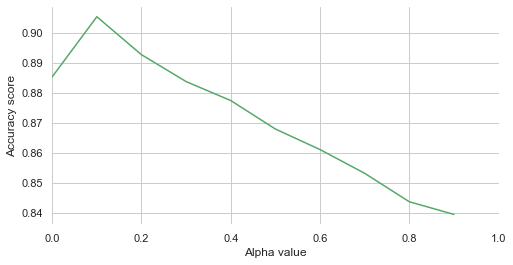

In [159]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 4))

# Plot the scores for each alpha
sns.lineplot(data=scores, color="g")

# Add a legend and informative axis label
ax.set(xlim=(0, 1), ylabel="Accuracy score",
       xlabel="Alpha value")
sns.despine(left=True, bottom=True)

Alpha of <u>0.1</u> returns the highest accuracy score!

<p>

We will use 0.1 in our Naive Bayes modeling

In [73]:
# Initialize Naive Bayes classifier
nb_classifier = MultinomialNB(alpha=0.1)

# Fitting the classifier to the training data
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(f'Accuracy: {score}')

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels= ['FAKE', 'REAL'])
print('Confusion Matrix:\n',cm)

Accuracy: 0.9058390320883746
Confusion Matrix:
 [[826 109]
 [ 70 896]]


In [163]:
# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB(alpha=0.1)

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(f'Accuracy: {score}')

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels= ['FAKE','REAL'])
print('Confusion Matrix:\n', cm)

Accuracy: 0.9053129931614939
Confusion Matrix:
 [[808 127]
 [ 53 913]]


In [174]:
def plot_confusion_matrix(data, labels, output_filename=0):
    """Plot confusion matrix using heatmap.
 
    Args:
        data (list of list): List of lists with confusion matrix data.
        labels (list): Labels which will be plotted across x and y axis.
        output_filename (str): Path to output file.
 
    """
    sns.set(color_codes=True)
    plt.figure(1, figsize=(12, 8))
 
    plt.title("Confusion Matrix")
 
    sns.set(font_scale=1.4)
    ax = sns.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'})
 
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
 
    ax.set(ylabel="True Label", xlabel="Predicted Label")
 
    #plt.savefig(output_filename, bbox_inches='tight', dpi=300)
    plt.show()
    


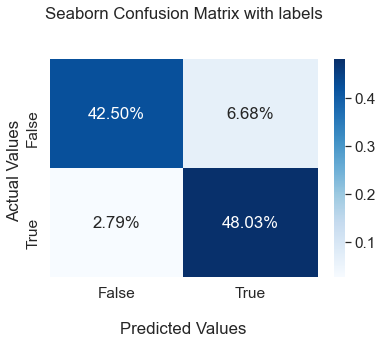

In [176]:
ax = sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

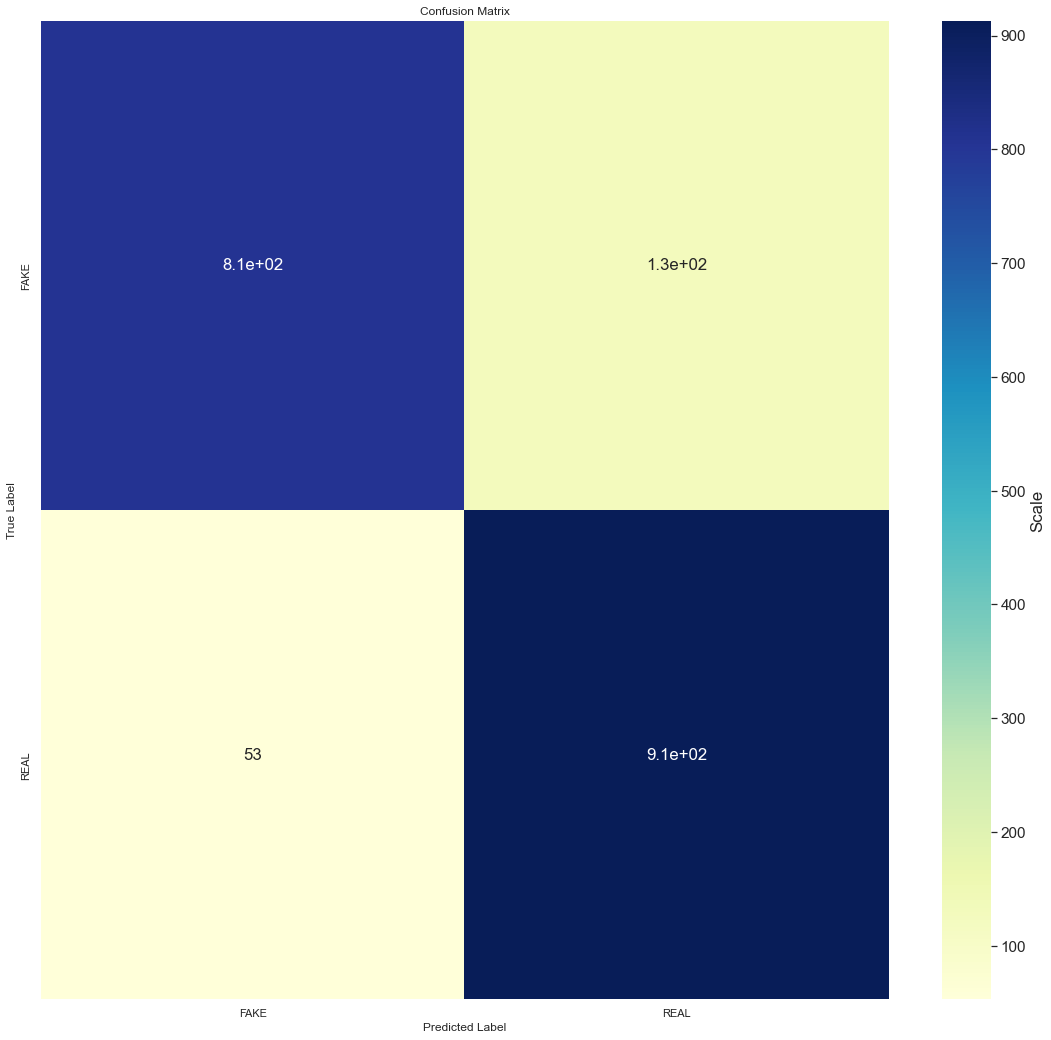

In [175]:
plot_confusion_matrix(cm, ['FAKE','REAL'])

In [73]:
# Initialize Naive Bayes classifier
nb_classifier = MultinomialNB(alpha=0.1)

# Fitting the classifier to the training data
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(f'Accuracy: {score}')

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels= ['FAKE', 'REAL'])
print('Confusion Matrix:\n',cm)

Accuracy: 0.9058390320883746
Confusion Matrix:
 [[826 109]
 [ 70 896]]


# Naive Bayes Multinomial Predictor

In [164]:
# Instantiate the classifier: nb_classifier
nb_classifier = MultinomialNB(alpha=0.1)
# Fit to the training data
nb_classifier.fit(tfidf_train, y_train)
# Predict the labels: pred
pred = nb_classifier.predict(tfidf_test)
# Compute accuracy: score
score = metrics.accuracy_score(y_test,pred)

# Get the class labels: class_labels
class_labels = nb_classifier.classes_

# Extract the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names()

# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.feature_log_prob_[1], feature_names))

# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:10])
print()

# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-10:])

FAKE [(-12.69233432692536, '000035'), (-12.69233432692536, '0001'), (-12.69233432692536, '000km'), (-12.69233432692536, '0011'), (-12.69233432692536, '005'), (-12.69233432692536, '005s'), (-12.69233432692536, '00684'), (-12.69233432692536, '006s'), (-12.69233432692536, '007'), (-12.69233432692536, '008s')]

REAL [(-6.420654267306063, 'state'), (-6.411250189660262, 'cruz'), (-6.381634244827573, 'republican'), (-6.344757796574216, 'campaign'), (-6.328064396317935, 'president'), (-6.299413849491218, 'sanders'), (-6.150857165942491, 'obama'), (-5.769684532668819, 'clinton'), (-5.569466461894935, 'said'), (-5.3223447522834055, 'trump')]


uh what dat mean up there^

In [73]:
# Initialize Naive Bayes classifier
nb_classifier = MultinomialNB(alpha=0.1)

# Fitting the classifier to the training data
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(f'Accuracy: {score}')

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels= ['FAKE', 'REAL'])
print('Confusion Matrix:\n',cm)

Accuracy: 0.9058390320883746
Confusion Matrix:
 [[826 109]
 [ 70 896]]


In [73]:
# Initialize Naive Bayes classifier
nb_classifier = MultinomialNB(alpha=0.1)

# Fitting the classifier to the training data
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(f'Accuracy: {score}')

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels= ['FAKE', 'REAL'])
print('Confusion Matrix:\n',cm)

Accuracy: 0.9058390320883746
Confusion Matrix:
 [[826 109]
 [ 70 896]]


In [161]:
# Initialize Naive Bayes classifier
nb_classifier = MultinomialNB(alpha=0.1)

# Fitting the classifier to the training data
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(f'Accuracy: {score}')

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels= ['FAKE', 'REAL'])
print('Confusion Matrix:\n',cm)

Accuracy: 0.9058390320883746
Confusion Matrix:
 [[826 109]
 [ 70 896]]


### Plotting

In [8]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()

# Get the class labels: class_labels
class_labels = nb_classifier.classes_

# Extract the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names()

# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))

# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:20])

# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])

AttributeError: 'MultinomialNB' object has no attribute 'classes_'

In [21]:
all_classes = np.array(['FAKE','REAL'])
print(all_classes)

nb =MultinomialNB(alpha=0.01)
nb.partial_fit(X_train, y_train, classes=all_classes)

['FAKE' 'REAL']


In [19]:
all_classes = 

AttributeError: 'MultinomialNB' object has no attribute 'A'

In [34]:
nbclass= MultinomialNB()
hasattr(MultinomialNB(), 'classes_')


False

In [71]:
# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))

# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:20])

# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])

AttributeError: 'MultinomialNB' object has no attribute 'coef_'

In [56]:
nb_classifier.feature_log_prob_[1].shape
#sum([np.exp(1)**x for x in nb_classifier.feature_log_prob_[1]])
#print(class_labels)
#print(feature_names)

AttributeError: 'numpy.ndarray' object has no attribute 'is_equal'

In [69]:
nb_classifier.feature_log_prob_[1][100]-nb_classifier.feature_log_prob_[0][100]

-0.22798494024257998

Alpha of <u>0.1</u> returns the highest accuracy score!

<p>

We will use 0.1 in our Naive Bayes modeling

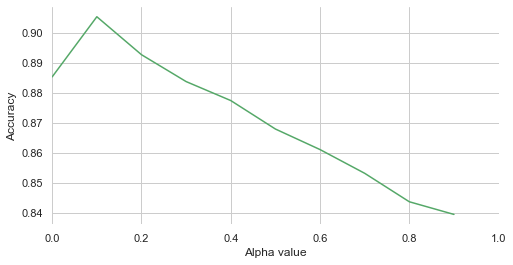

In [150]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 4))

# Plot the scores for each alpha
sns.lineplot(data=scores, color="g")

# Add a legend and informative axis label
ax.set(xlim=(0, 1), ylabel="Accuracy",
       xlabel="Alpha value")
sns.despine(left=True, bottom=True)

### Plotting alpha test

In [64]:
nb_classifier.feature_log_prob_[1][1]


-8.526322044808872

# Alpha testing

In [152]:
###Extract features to use in making prediction
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
# Create the list of alphas: alphas
alphas = np.arange(0,1,.10)
scores ={}
# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train, y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test,pred)
    scores[alpha] = score
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  0.0
Score:  0.8853235139400316

Alpha:  0.1
Score:  0.9053129931614939

Alpha:  0.2
Score:  0.8926880589163598

Alpha:  0.30000000000000004
Score:  0.8837453971593898

Alpha:  0.4
Score:  0.8774329300368228

Alpha:  0.5
Score:  0.8679642293529721

Alpha:  0.6000000000000001
Score:  0.8611257233035244

Alpha:  0.7000000000000001
Score:  0.8532351394003156

Alpha:  0.8
Score:  0.8437664387164651

Alpha:  0.9
Score:  0.8395581273014203

